# import the libraries

In [1]:
import pandas as pd 

# importing dataset

In [2]:
data = pd.read_csv('heart.csv')

# taking care of missing values

In [3]:
data.isnull().sum() # we dont have any null values in dataset 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# taking care of duplicate values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

# data processing 

In [9]:
# let saparate the categorical columns and numeric columns.......!

cate_val=[]
numc_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        numc_val.append(column)

In [10]:
cate_val        # categorical columns.............!

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
numc_val       #  numeric columns.................!

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding categorical data

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data, columns=cate_val, drop_first=True)

In [15]:
data.head(20)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,58,0,100,248,122,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,58,1,114,318,140,4.4,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,55,1,160,289,145,0.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
8,46,1,120,249,144,0.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,54,1,122,286,116,3.2,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


# feature scaling

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()
data[numc_val]=st.fit_transform(data[numc_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# splitting the dataset into training set and test set

In [20]:
x = data.drop('target',axis=1)

In [21]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
y = data['target']

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

In [26]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [28]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 1.logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred1 )

0.7868852459016393

# SVC (support vector classifier)

In [35]:
from sklearn import svm

In [36]:
svm = svm.SVC()

In [37]:
svm.fit(x_train , y_train)

SVC()

In [38]:
y_pred2 = svm.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# k Neighbor classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [43]:
y_pred3=knn.predict(x_test)

In [44]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [45]:
# score = []

# for k in range(1,40):
#     knn=KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train, y_train)
#     y_pred=knn.predict(x_test)
#     score.append(accuracy_score(y_test, y_pred))

In [46]:
# score

In [47]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

# non-linear ML Alogorithms . this type of ML algo's or not requer data preprocessing and feature_scalling

In [48]:
data =pd.read_csv('heart.csv')

In [49]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:
data=data.drop_duplicates()

In [51]:
data.shape

(302, 14)

In [52]:
x = data.drop('target', axis=1)
y = data['target']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred4 = dt.predict(x_test)

In [58]:
y_pred4

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test, y_pred4)

0.7540983606557377


# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred5 = rf.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

# Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()

In [67]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [68]:
y_pred6 = gbc.predict(x_test)

In [69]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [70]:
final_data = pd.DataFrame({'models':['LR','SVM','KNN','DT', 'RF','GB'],
                           'accuracy':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred2),
                                       accuracy_score(y_test,y_pred3),
                                       accuracy_score(y_test,y_pred4),
                                       accuracy_score(y_test,y_pred5),
                                       accuracy_score(y_test,y_pred6),]})

In [71]:
final_data

,models,accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.836066
5,GB,0.803279


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='accuracy'>

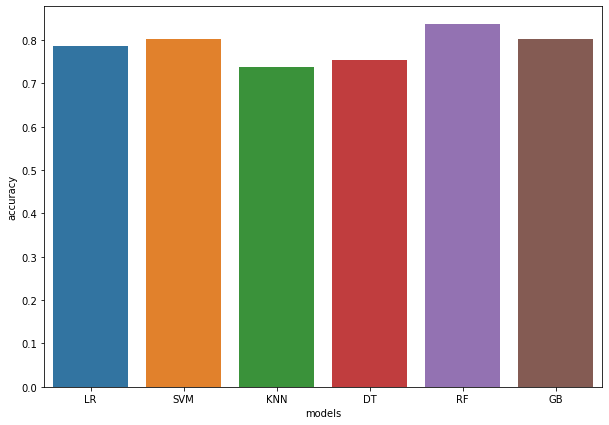

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(final_data['models'],final_data['accuracy'])

In [74]:
# Now we are going to use this random forest classifier in our production, 
# so Please remember we have used a train test plate just to evaluate the 
# performance of our modelsfor production we have to train our model on entire 
# data set. So let's train our best model on entire datasets.

In [75]:
x = data.drop('target', axis=1)
y = data['target']

In [76]:
x.shape

(302, 13)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(x,y)

RandomForestClassifier()

# prediction on new data

In [80]:
import pandas as pd 

In [82]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
 },index=[0])

In [83]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [84]:
p = rf.predict(new_data)
if p[0]==0:
    print("no-disease")
else:
    print("you may have heart disease")

no-disease


# let save the rf model using joblib 

In [85]:
import joblib

In [86]:
joblib.dump(rf,'model_heart_prediction') # rf is our model and saving it in model_heart_prediction named file

['model_heart_prediction']

In [87]:
model = joblib.load('model_heart_prediction') # loading our saved model into a variable  

In [88]:
model.predict(new_data) 

array([0], dtype=int64)